--- 1) Cargando datos ---
--- 2) Escalando features ---
--- 3) Generando Clusters (K-Means) ---


/Users/julz/.asdf/installs/python/3.12.2/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/julz/.asdf/installs/python/3.12.2/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/julz/.asdf/installs/python/3.12.2/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/julz/.asdf/installs/python/3.12.2/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/julz/.asdf/installs/python/3.12.2/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/julz/.asdf/installs/python/3.12.2/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: Runt


--- 4) Entrenando Autoencoder ---
Epoch 1/50
3333/3333 ━━━━━━━━━━━━━━━━━━━━ 1s 293us/step - loss: 0.3059 - val_loss: 0.1551
Epoch 2/50
3333/3333 ━━━━━━━━━━━━━━━━━━━━ 1s 275us/step - loss: 0.1581 - val_loss: 0.1307
Epoch 3/50
3333/3333 ━━━━━━━━━━━━━━━━━━━━ 1s 276us/step - loss: 0.1342 - val_loss: 0.1220
Epoch 4/50
3333/3333 ━━━━━━━━━━━━━━━━━━━━ 1s 289us/step - loss: 0.1297 - val_loss: 0.1204
Epoch 5/50
3333/3333 ━━━━━━━━━━━━━━━━━━━━ 1s 286us/step - loss: 0.1279 - val_loss: 0.1191
Epoch 6/50
3333/3333 ━━━━━━━━━━━━━━━━━━━━ 1s 283us/step - loss: 0.1267 - val_loss: 0.1192
Epoch 7/50
3333/3333 ━━━━━━━━━━━━━━━━━━━━ 1s 278us/step - loss: 0.1259 - val_loss: 0.1189
Epoch 8/50
3333/3333 ━━━━━━━━━━━━━━━━━━━━ 1s 277us/step - loss: 0.1253 - val_loss: 0.1189
Epoch 9/50
3333/3333 ━━━━━━━━━━━━━━━━━━━━ 1s 278us/step - loss: 0.1248 - val_loss: 0.1189
Epoch 10/50
3333/3333 ━━━━━━━━━━━━━━━━━━━━ 1s 279us/step - loss: 0.1244 - val_loss: 0.1172
Epoch 11/50
3333/3333 ━━━━━━━━━━━━━━━━━━━━ 1s 280us/step - loss:

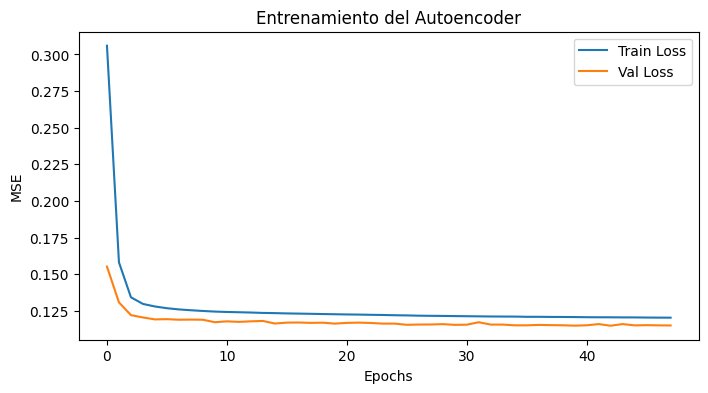

--- 5) Generando Embeddings ---
7406/7406 ━━━━━━━━━━━━━━━━━━━━ 1s 143us/step
Shape de Embeddings: (236980, 6)
--- 6) Guardando modelo y artefactos ---
💾 Saved: music_recommender_neural.joblib



Ingresá una canción para probar el modelo neuronal:  Believe



Recomendaciones para: Believe - Elton John
Cluster base: Rock/Pop Energético y Optimista
--------------------------------------------------
* Safe (Westlife)
  Cluster: Rock/Pop Energético y Optimista | Distancia: 0.1858
* It's A Good Life If You Don't Weaken (Tragically Hip)
  Cluster: Rock/Pop Energético y Optimista | Distancia: 0.1965
* Don't Throw It All Away (Bee Gees)
  Cluster: Rock/Pop Energético y Optimista | Distancia: 0.1997
* Older (George Michael)
  Cluster: Rock/Pop Energético y Optimista | Distancia: 0.2122
* I Will Follow You (Modern Talking)
  Cluster: Rock/Pop Energético y Optimista | Distancia: 0.2195


/Users/julz/.asdf/installs/python/3.12.2/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/julz/.asdf/installs/python/3.12.2/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/julz/.asdf/installs/python/3.12.2/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import hstack, csr_matrix
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- 1) Load data ---
df = pd.read_csv("light_spotify_dataset.csv")

# --- 2) Columnas necesarias ---

cols_id = ["song", "artist"]

cols_caracteristicas = [
    "Danceability",
    "Energy",
    "variance",
    "Tempo",
    "Loudness",
    "Acousticness",
    "Instrumentalness",
    "Speechiness",
    "Positiveness",
    "Popularity",
    "Liveness",
]

cols_necesarias = cols_id + cols_caracteristicas

faltante = [c for c in cols_necesarias if c not in df.columns]
if faltante:
    raise ValueError(f"Faltan columnas esperadas: {faltante}")

# Eliminamos filas con nulos en cualquiera de las columnas necesarias
df = df.dropna(subset=cols_necesarias).reset_index(drop=True)

# --- 3) Preparamos las features ---

# Features numéricas para los modelos
caracteristicas_numericas = df[cols_caracteristicas].to_numpy(dtype=float)

# Escalamos las features
scaler = StandardScaler()
numericas_escaladas = scaler.fit_transform(caracteristicas_numericas)

# Matriz densa para K-Means / Naive Bayes
X_dense = numericas_escaladas

# Matriz sparse para KNN
X = csr_matrix(numericas_escaladas)

# --- 4) NearestNeighbors (recomendador base) ---

mejores_parametros = {"n_neighbors": 10, "metric": "cosine", "algorithm": "brute"}
knn = NearestNeighbors(**mejores_parametros)
knn.fit(X)

# Hiperparámetros elegidos:
# n_neighbors = 10  -> 10 recomendaciones
# metric = 'cosine' -> similaridad de patrón, común en música
# algorithm = 'brute' -> funciona bien con métrica coseno y ~11 features

# --- 5) Clustering con K-Means ---

# Elbow method (para el informe / gráfico)
inercias = []
K = range(2, 9)   # probamos más valores de k ahora que hay más features

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_dense)
    inercias.append(km.inertia_)

# Plot del elbow method
plt.figure(figsize=(6, 4))
plt.plot(list(K), inercias, marker='o')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.title("Método del Codo (Elbow Method)")
plt.grid(True)
plt.show()

# Entreno modelo final con k elegido (ajustar según el gráfico)
k_opt = 6
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_dense)

# Nombres de clusters en base a Matriz de Correlación
nombres_clusters = {
    0: "Pop Urbano / Rap Melódico / Trap Mainstream",
    1: "Rock/Metal + Rap Intenso + Worship en vivo",
    2: "Vocal Jazz",      # Acousticness
    3: "Rap / Hip Hop",         # Danceability / Speechiness
    4: "Rock/Industrial Atmosférico & Electrónica Oscura",  # Instrumentalness
    5: "Rock/Pop Energético y Optimista"         # Tempo / Positiveness
}

df["nombre_cluster"] = df["cluster"].map(nombres_clusters)
print("--- Nombres asignados ---")
print(df[["cluster", "nombre_cluster"]].drop_duplicates().sort_values("cluster"))

# --- Análisis de los clusters ---
# usar TODAS las features numéricas, no solo 4
perfil_cluster = df.groupby("cluster")[cols_caracteristicas].mean()
import seaborn as sns

# Normalizamos de 0 a 1 solo para que el gráfico se entienda mejor visualmente
df_norm_vis = (perfil_cluster - perfil_cluster.min()) / (perfil_cluster.max() - perfil_cluster.min())

plt.figure(figsize=(10, 6))
sns.heatmap(df_norm_vis, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Mapa de calor: Qué define a cada Cluster")
plt.ylabel("Cluster ID")
plt.show()

print("=== Perfil promedio por cluster ===")
print(perfil_cluster)

# --- 5) Clasificación con Naive Bayes ---

# X = features musicales escaladas (X_dense)
# y = cluster asignado por K-Means
y = df["cluster"].values

X_train, X_test, y_train, y_test = train_test_split(
    X_dense, y, test_size=0.2, random_state=42, stratify=y
)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Exactitud Naive Bayes: {acc:.3f}")
print("Matriz de confusion:")
print(cm)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# --- Plot de la matriz de confusión ---

plt.figure(figsize=(7, 6))
plt.imshow(cm, cmap="Blues")
plt.title("Matriz de Confusión - Gaussian Naive Bayes")
plt.xlabel("Etiqueta Predecida")
plt.ylabel("Etiqueta Verdadera")

# Agregar los valores dentro de cada celda
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha='center', va='center', color='black')

plt.colorbar()
plt.tight_layout()
plt.show()

from scipy.sparse import csr_matrix
import numpy as np

cols_caracteristicas = [
    "Danceability",
    "Energy",
    "variance",
    "Tempo",
    "Loudness",
    "Acousticness",
    "Instrumentalness",
    "Speechiness",
    "Positiveness",
    "Popularity",
    "Liveness",
]

# --- single feature vector by row ---
def crea_vector_caracteristicas(row_idx: int):
    """
    Construye el vector de features escalado para una canción
    usando TODAS las features numéricas definidas en cols_caracteristicas
    y lo devuelve en formato sparse, para usar con KNN.
    """
    row = (
        df.loc[row_idx, cols_caracteristicas]
          .to_numpy(dtype=float)
          .reshape(1, -1)
    )
    e_scaled = scaler.transform(row)     # usa el mismo scaler que se ajustó con cols_caracteristicas
    return csr_matrix(e_scaled)

import joblib

# --- Canción por index junto con artista ---
def obtener_indice_cancion(cancion: str, artist: str | None = None) -> int:
    name_mask = df["song"].str.casefold().str.strip() == cancion.casefold().strip()
    if not name_mask.any():
        raise ValueError(f"Cancion '{cancion}' no encontrada.")

    if artist is not None and "artist" in df.columns:
        artist_mask = df["artist"].str.casefold().str.strip() == artist.casefold().strip()
        mask = name_mask & artist_mask
        if not mask.any():
            options = df.loc[name_mask, "artist"].dropna().unique().tolist()
            raise ValueError(
                f"Sin coincidencia para '{cancion}' de '{artist}'. "
                f"Artistas disponibles para este titulo: {options}"
            )
        idxs = df.index[mask].tolist()
    else:
        idxs = df.index[name_mask].tolist()
        if len(idxs) > 1:
            options = df.loc[idxs, "artist"].dropna().unique().tolist()
            raise ValueError(
                f"Titulo ambiguo '{cancion}'. Por favor, especificar artista. "
                f"Opciones: {options}"
            )

    return idxs[0]


# --- Encuentra canciones similares ---
def recomendar_por_nombre_cancion(
    cancion: str,
    top_k: int = 10,
    artist: str | None = None,
    same_cluster: bool = True
):
    """
    Recomienda canciones similares usando KNN.
    Si same_cluster=True, solo devuelve temas del mismo cluster que la canción seed.
    """
    # índice de la canción seed
    idx = obtener_indice_cancion(cancion, artist)

    # vector de features escalado (formato sparse)
    q_sparse = crea_vector_caracteristicas(idx)

    # cluster de la canción seed (asignado por K-Means)
    seed_cluster = df.loc[idx, "cluster"]

    # pedimos más vecinos por si varios quedan fuera al filtrar por cluster
    distances, indices = knn.kneighbors(q_sparse, n_neighbors=top_k + 20)

    recs = []
    for d, i in zip(distances[0], indices[0]):
        if i == idx:
            continue  # saltar la propia canción seed

        # si queremos restringir al mismo cluster
        if same_cluster and df.loc[i, "cluster"] != seed_cluster:
            continue

        recs.append({
            "song": df.loc[i, "song"],
            "artist": df.loc[i, "artist"],
            "cluster": int(df.loc[i, "cluster"]),
            "distance": float(d),
            "Danceability": df.loc[i, "Danceability"],
            "Energy": df.loc[i, "Energy"],
            "Positiveness": df.loc[i, "Positiveness"],
            "Loudness": df.loc[i, "Loudness"],
        })

        if len(recs) == top_k:
            break

    return recs


# --- Guardar artifacts para frontend (actualizados) ---
artifacts = {
    "knn_model": knn,
    "scaler": scaler,
    "mejores_parametros": mejores_parametros,
    "feature_matrix_shape": X.shape,
    "cols_caracteristicas": cols_caracteristicas,
    "track_index": df[["song", "artist"] + cols_caracteristicas + ["cluster"]],
    "kmeans_model": kmeans,
    "naive_bayes_model": nb,
    "nombres_clusters": nombres_clusters,
}
joblib.dump(artifacts, "music_recommender_with_clusters.joblib")
print("💾 Grabado en: music_recommender_with_clusters.joblib")

# --- smoke test ---
try:
    user_track = input("Enter a cancion name: ").strip()
    user_artist = None

    try:
        recs = recomendar_por_nombre_cancion(user_track, top_k=10)  # same_cluster=True por default
        print(f"\nRecomendaciones para: {user_track}\n")
    except ValueError as amb:
        text = str(amb)
        if "Por favor, especificar artista" in text:
            print(text)
            user_artist = input("Ingresar el artista para desambigüar: ").strip()
            recs = recomendar_por_nombre_cancion(user_track, top_k=10, artist=user_artist)
            print(f"\nRecomendaciones para: {user_track} | {user_artist}\n")
        else:
            raise

    for r in recs:
        print(
            f"  - {r['song']} | {r['artist']} | "
            f"Danceability={r['Danceability']} | Energy={r['Energy']} | "
            f"Positiveness={r['Positiveness']} | Loudness={r['Loudness']} | "
            f"cluster={r.get('cluster', 'NA')} | "
            f"dist={r['distance']:.3f}"
        )

except Exception as e:
    print("Smoke test skipped:", e)

cancion = "Dance"
artist = "Rick Astley"

# 1) find the row index
idx = obtener_indice_cancion(cancion, artist)

# 2) build query vector for that row
q = crea_vector_caracteristicas(idx)

# 3) get neighbors (over-ask a bit so we can skip seed/dupes)
k = 10
distances, indices = knn.kneighbors(q, n_neighbors=k + 1)

seen = set()
count = 0
for d, i in zip(distances[0], indices[0]):
    if i == idx:
        continue  # skip the seed itself

    # similarity for cosine metric
    sim = max(0.0, min(1.0, 1.0 - float(d)))  # clamp to [0,1]

    # optional: de-duplicate same (song, artist)
    key = (df.at[i, "song"], df.at[i, "artist"])
    if key in seen:
        continue
    seen.add(key)

    song = df.at[i, "song"]
    art  = df.at[i, "artist"]
    print(f"{song} | {art} | dist={d:.8f} | sim={sim:.4f}")

    count += 1
    if count == k:
        break